In [1]:
#focus on spatial features, such as shot_distance

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

//anaconda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [2]:
data = pd.read_csv('data.csv')
print data.shape
data.info()

(30697, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
action_type           30697 non-null object
combined_shot_type    30697 non-null object
game_event_id         30697 non-null int64
game_id               30697 non-null int64
lat                   30697 non-null float64
loc_x                 30697 non-null int64
loc_y                 30697 non-null int64
lon                   30697 non-null float64
minutes_remaining     30697 non-null int64
period                30697 non-null int64
playoffs              30697 non-null int64
season                30697 non-null object
seconds_remaining     30697 non-null int64
shot_distance         30697 non-null int64
shot_made_flag        25697 non-null float64
shot_type             30697 non-null object
shot_zone_area        30697 non-null object
shot_zone_basic       30697 non-null object
shot_zone_range       30697 non-null object
team_id               30697 non-null int64
team_n

In [3]:
#target variable, 5000 missing as test dataset
print data['shot_made_flag'].value_counts()
print data['shot_made_flag'].isnull().sum()

0.0    14232
1.0    11465
Name: shot_made_flag, dtype: int64
5000


Useless features: game_event_id, game_id, lat, lon, team_id, team_name

## 'action_type' and 'combined_shot_type'

Both 'action_type' and 'combined_shot_type' seem to be relevant features

In [4]:
data['action_type'].unique()

array(['Jump Shot', 'Driving Dunk Shot', 'Layup Shot', 'Running Jump Shot',
       'Driving Layup Shot', 'Reverse Layup Shot', 'Reverse Dunk Shot',
       'Slam Dunk Shot', 'Turnaround Jump Shot', 'Tip Shot',
       'Running Hook Shot', 'Alley Oop Dunk Shot', 'Dunk Shot',
       'Alley Oop Layup shot', 'Running Dunk Shot',
       'Driving Finger Roll Shot', 'Running Layup Shot',
       'Finger Roll Shot', 'Fadeaway Jump Shot', 'Follow Up Dunk Shot',
       'Hook Shot', 'Turnaround Hook Shot', 'Running Tip Shot',
       'Jump Hook Shot', 'Running Finger Roll Shot', 'Jump Bank Shot',
       'Turnaround Finger Roll Shot', 'Hook Bank Shot',
       'Driving Hook Shot', 'Running Reverse Layup Shot',
       'Driving Finger Roll Layup Shot', 'Fadeaway Bank shot',
       'Pullup Jump shot', 'Finger Roll Layup Shot',
       'Turnaround Fadeaway shot', 'Driving Reverse Layup Shot',
       'Driving Slam Dunk Shot', 'Step Back Jump shot',
       'Reverse Slam Dunk Shot', 'Turnaround Bank shot',
   

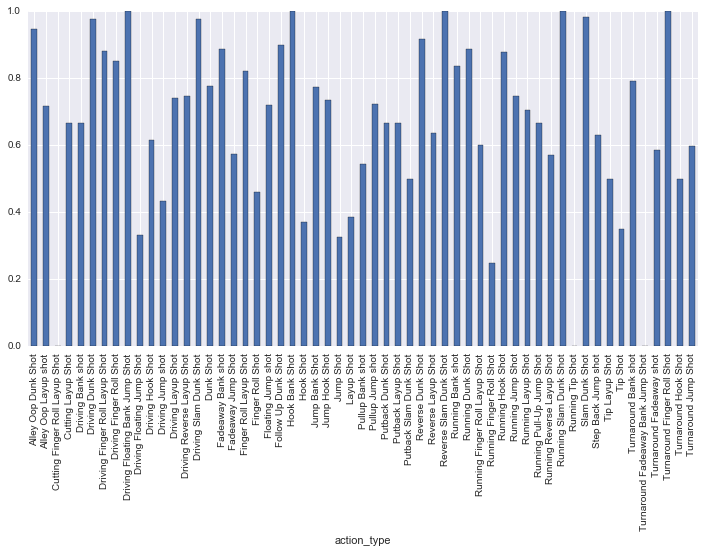

In [6]:
data.groupby('action_type')['shot_made_flag'].mean().plot(kind='bar',figsize=(12,6))

In [7]:
data['combined_shot_type'].value_counts()

Jump Shot    23485
Layup         5448
Dunk          1286
Tip Shot       184
Hook Shot      153
Bank Shot      141
Name: combined_shot_type, dtype: int64

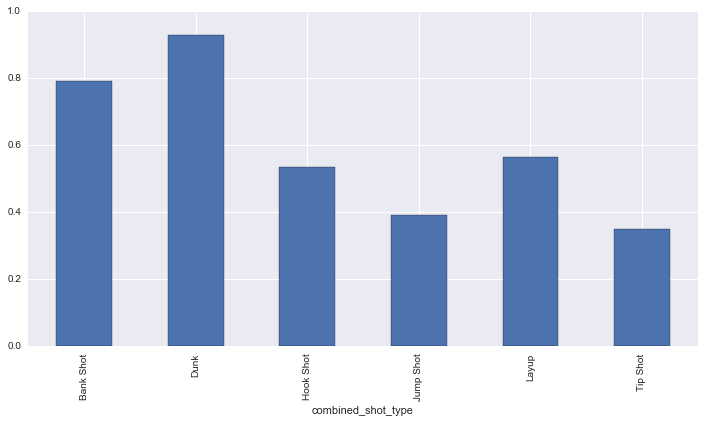

In [8]:
data.groupby('combined_shot_type')['shot_made_flag'].mean().plot(kind='bar',figsize=(12,6))

## Shot type

two-point vs three-point, seems like relevant features

In [11]:
pd.crosstab(data['shot_type'],data['shot_made_flag'])

shot_made_flag,0.0,1.0
shot_type,,
2PT Field Goal,10602,9683
3PT Field Goal,3630,1782


In [37]:
data.groupby('shot_type')['shot_made_flag'].mean()

shot_type
2PT Field Goal    0.477348
3PT Field Goal    0.329268
Name: shot_made_flag, dtype: float64

## shot_distance

seem like relevant features, may overlap with shot_zone_area/basic/range

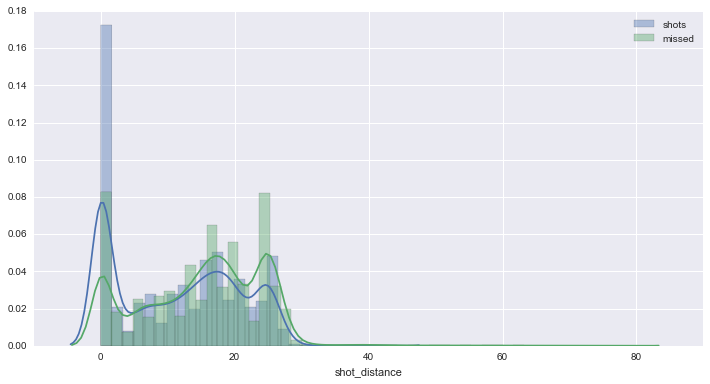

In [14]:
plt.figure(figsize=(12,6))
sns.distplot(data[data['shot_made_flag']==1.0]['shot_distance'],label='shots')
sns.distplot(data[data['shot_made_flag']==0.0]['shot_distance'],label='missed')
plt.legend()

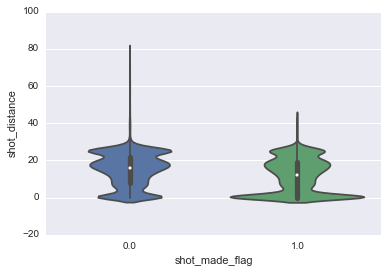

In [17]:
sns.violinplot(x='shot_made_flag',y='shot_distance',data=data)

## shot_zone_area/basic/range

Correlate with shot_percentage, but highly correlate with shot_distance, maybe create 'backcourt' as a feature

In [21]:
data.groupby('shot_zone_area')['shot_made_flag'].mean()

shot_zone_area
Back Court(BC)           0.013889
Center(C)                0.525556
Left Side Center(LC)     0.361177
Left Side(L)             0.396871
Right Side Center(RC)    0.382567
Right Side(R)            0.401658
Name: shot_made_flag, dtype: float64

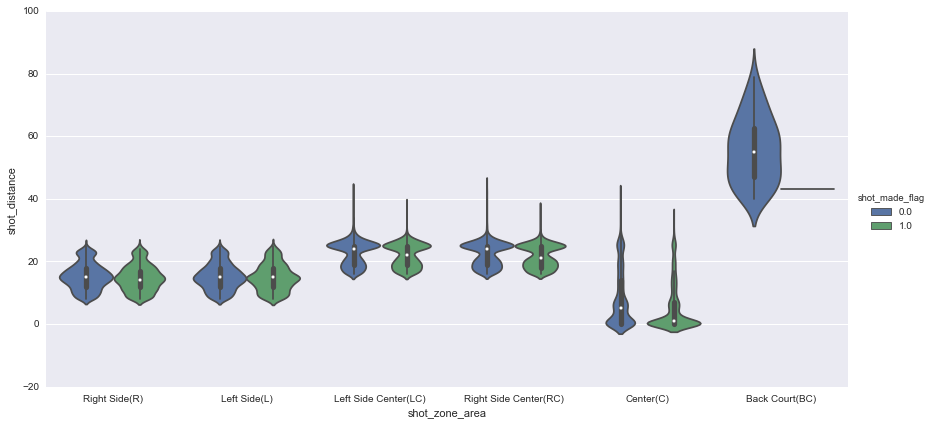

In [32]:
sns.factorplot(x="shot_zone_area", y="shot_distance", hue="shot_made_flag",data=data, \
               kind="violin",size=6, aspect=2)

In [22]:
data.groupby('shot_zone_basic')['shot_made_flag'].mean()

shot_zone_basic
Above the Break 3        0.329237
Backcourt                0.016667
In The Paint (Non-RA)    0.454381
Left Corner 3            0.370833
Mid-Range                0.406286
Restricted Area          0.618004
Right Corner 3           0.339339
Name: shot_made_flag, dtype: float64

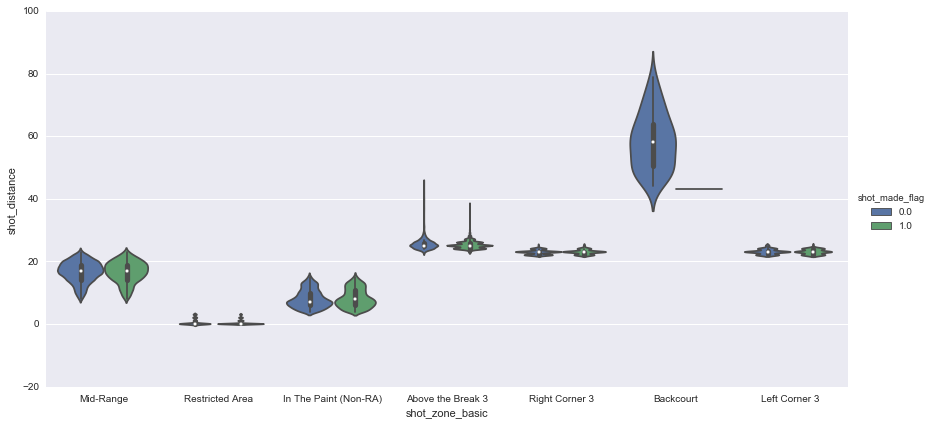

In [31]:
sns.factorplot(x="shot_zone_basic", y="shot_distance", hue="shot_made_flag",data=data, \
               kind="violin",size=6, aspect=2)

In [23]:
data.groupby('shot_zone_range')['shot_made_flag'].mean()

shot_zone_range
16-24 ft.          0.401766
24+ ft.            0.332513
8-16 ft.           0.435484
Back Court Shot    0.013889
Less Than 8 ft.    0.573120
Name: shot_made_flag, dtype: float64

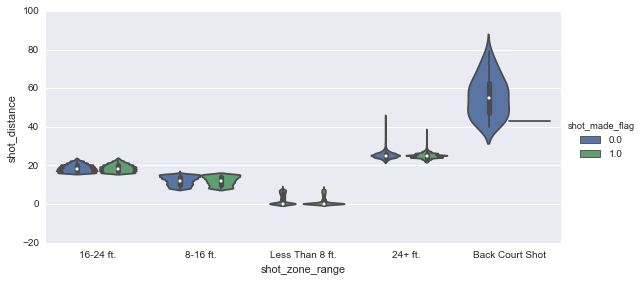

In [28]:
sns.factorplot(x="shot_zone_range", y="shot_distance", hue="shot_made_flag",data=data, \
               kind="violin",size=4, aspect=2)

## loc_x and loc_y

Take absolute for loc_x; both loc_x and loc_y seem to correlate with shot_distance

In [33]:
data['loc_x'].describe()

count    30697.000000
mean         7.110499
std        110.124578
min       -250.000000
25%        -68.000000
50%          0.000000
75%         95.000000
max        248.000000
Name: loc_x, dtype: float64

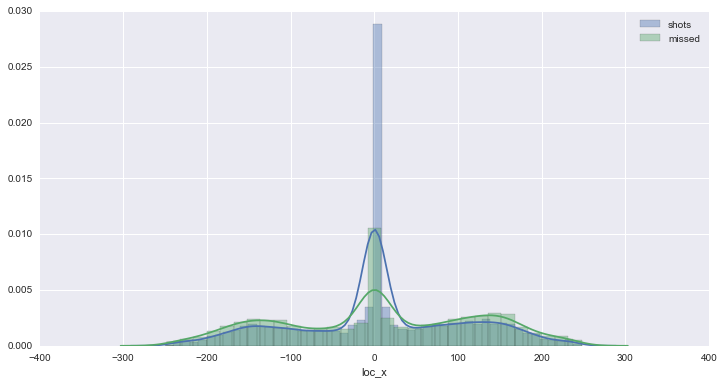

In [34]:
plt.figure(figsize=(12,6))
sns.distplot(data[data['shot_made_flag']==1.0]['loc_x'],label='shots')
sns.distplot(data[data['shot_made_flag']==0.0]['loc_x'],label='missed')
plt.legend()

In [46]:
data['abs_loc_x'] = data['loc_x'].apply(lambda x: abs(x))
data['abs_loc_x'].describe()

count    30697.000000
mean        85.200801
std         70.132521
min          0.000000
25%         11.000000
50%         85.000000
75%        143.000000
max        250.000000
Name: abs_loc_x, dtype: float64

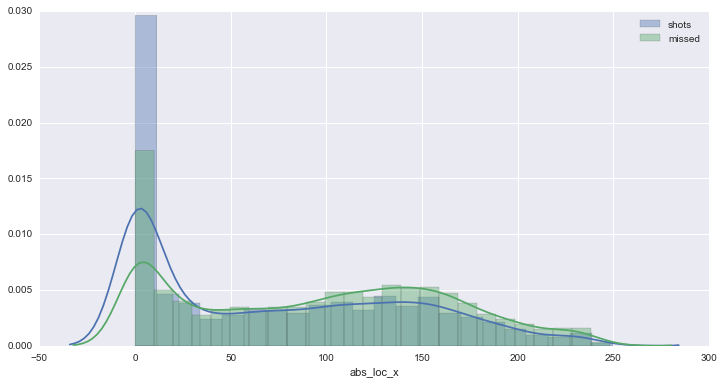

In [47]:
plt.figure(figsize=(12,6))
sns.distplot(data[data['shot_made_flag']==1.0]['abs_loc_x'],label='shots')
sns.distplot(data[data['shot_made_flag']==0.0]['abs_loc_x'],label='missed')
plt.legend()

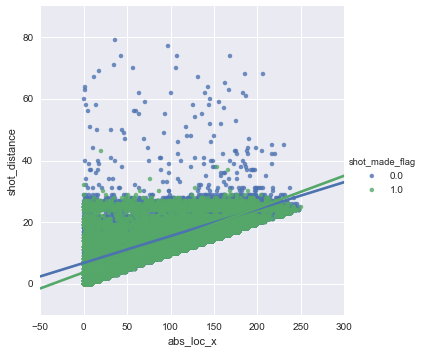

In [48]:
sns.lmplot(x='abs_loc_x',y='shot_distance',hue='shot_made_flag',data=data)

In [35]:
data['loc_y'].describe()

count    30697.000000
mean        91.107535
std         87.791361
min        -44.000000
25%          4.000000
50%         74.000000
75%        160.000000
max        791.000000
Name: loc_y, dtype: float64

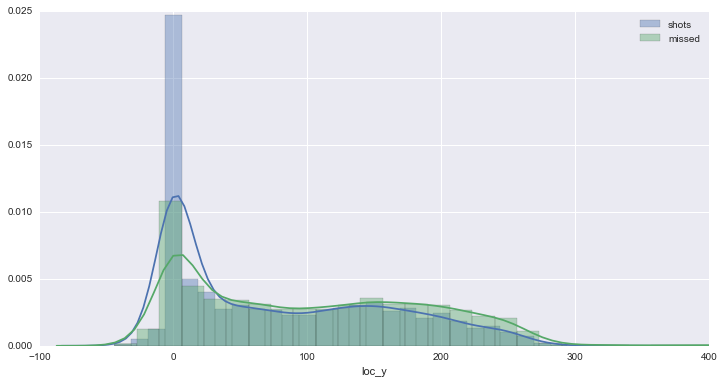

In [36]:
plt.figure(figsize=(12,6))
sns.distplot(data[data['shot_made_flag']==1.0]['loc_y'],label='shots')
sns.distplot(data[data['shot_made_flag']==0.0]['loc_y'],label='missed')
plt.xlim([-100,400])
plt.legend()

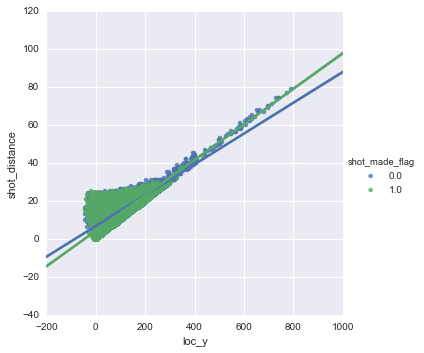

In [45]:
sns.lmplot(x='loc_y',y='shot_distance',hue='shot_made_flag',data=data)

## Modify base modeling

Use both 'roc_auc' and 'accuracy' as metrics for cross-validation 
<br>
Add 'shot_zone_basic/area/range' but no improvement
<br>
Add 'backcourt?' and no improvement
<br>
Add 'loc_y' and 'abs_loc_x' and some improvement

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import KFold, train_test_split,cross_val_score
from sklearn import metrics

#input df with both train and test
def base_feature(data):
    #at home or not
    data['home?'] = data['matchup'].apply(lambda x: x.split('@')[0].strip()=='LAL')
    #2-point or 3-point shot
    data['shot_type?'] = data['shot_type']=='2PT Field Goal'
    #playoff or not
    data['playoffs?'] = data['playoffs']==1
    return data

#encode categorical variable into sorted integer, and plotting
def sort_encode(df, field):
    ct = pd.crosstab(df.shot_made_flag, df[field]).apply(lambda x:x/x.sum(), axis=0)
    temp = list(zip(ct.values[1, :], ct.columns))
    temp.sort()
    new_map = {}
    for index, (acc, old_number) in enumerate(temp):
        new_map[old_number] = index
    new_field = field + '_sort_enumerated'
    df[new_field] = df[field].map(new_map)
    get_acc(df, new_field)


#plot one col in df against shot_made_flag percentage
def get_acc(df, col):
    ct = pd.crosstab(df.shot_made_flag, df[col]).apply(lambda x:x/x.sum(), axis=0)
    x, y = ct.columns, ct.values[1, :]
    plt.figure(figsize=(7, 5))
    plt.plot(x, y)
    plt.xlabel(col)
    plt.ylabel('% shots made')



In [5]:
#base modeling with randomforest
def test_accuracy(data): #input data with cols_use and 'shot_made_flag'
    clf = RandomForestClassifier(n_estimators=100,n_jobs=-1,max_depth=7) #specify tree and depth
    return cross_val_score(clf, data.drop('shot_made_flag', 1), data.shot_made_flag,scoring='accuracy', cv=10)

# another test function with roc_auc as metrics instead of accuracy
def test_auc(data): #input data with cols_use and 'shot_made_flag'
    clf = RandomForestClassifier(n_estimators=100,n_jobs=-1,max_depth=7) #specify tree and depth
    return cross_val_score(clf, data.drop('shot_made_flag', 1), data.shot_made_flag,\
                           scoring='roc_auc', cv=10)

In [6]:
data = base_feature(data)
data.columns

Index([u'action_type', u'combined_shot_type', u'game_event_id', u'game_id',
       u'lat', u'loc_x', u'loc_y', u'lon', u'minutes_remaining', u'period',
       u'playoffs', u'season', u'seconds_remaining', u'shot_distance',
       u'shot_made_flag', u'shot_type', u'shot_zone_area', u'shot_zone_basic',
       u'shot_zone_range', u'team_id', u'team_name', u'game_date', u'matchup',
       u'opponent', u'shot_id', u'home?', u'shot_type?', u'playoffs?'],
      dtype='object')

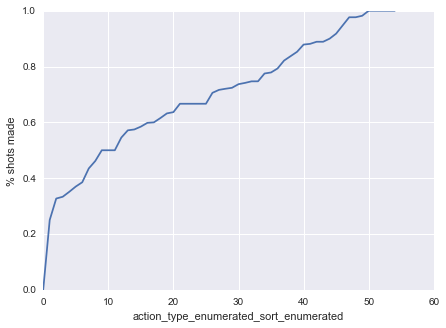

In [7]:
action_map = {action: i for i, action in enumerate(data.action_type.unique())}
data['action_type_enumerated'] = data.action_type.map(action_map)
#add column 'action_type_enumerated_sort_enumerated'
sort_encode(data, 'action_type_enumerated')

In [8]:
cols_use=['action_type_enumerated_sort_enumerated',
         'playoffs?','home?', 'shot_type?', 'shot_distance','shot_made_flag']
df = data[cols_use]
df = df.dropna()
print test_auc(df).mean()
print test_accuracy(df).mean()

0.699763594802
0.680504924147


0.700177602798
0.68073850834


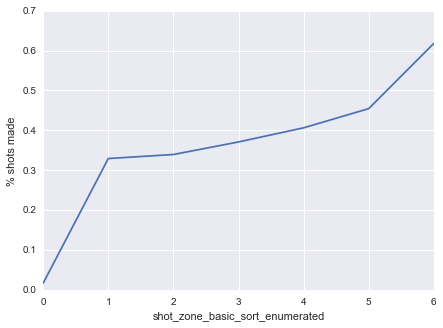

In [9]:
#add shot_zone_basic', slight improvement
sort_encode(data,'shot_zone_basic')
cols_use1=['action_type_enumerated_sort_enumerated','shot_zone_basic_sort_enumerated',
         'playoffs?','home?', 'shot_type?', 'shot_distance','shot_made_flag']
df = data[cols_use1]
df = df.dropna()
print test_auc(df).mean()
print test_accuracy(df).mean()

0.701121557929
0.681244496401


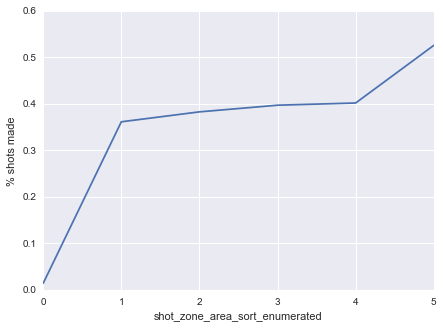

In [10]:
#add 'shot_zone_area', slight improvement
sort_encode(data,'shot_zone_area')
cols_use2=['action_type_enumerated_sort_enumerated','shot_zone_area_sort_enumerated',
         'playoffs?','home?', 'shot_type?', 'shot_distance','shot_made_flag']
df = data[cols_use2]
df = df.dropna()
print test_auc(df).mean()
print test_accuracy(df).mean()

0.699646647942
0.680621791969


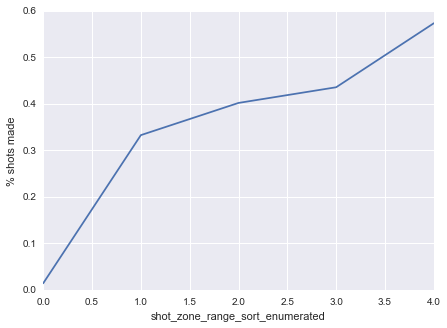

In [11]:
#add 'shot_zone_range', no change
sort_encode(data,'shot_zone_range')
cols_use3=['action_type_enumerated_sort_enumerated','shot_zone_range_sort_enumerated',
         'playoffs?','home?', 'shot_type?', 'shot_distance','shot_made_flag']
df = data[cols_use3]
df = df.dropna()
print test_auc(df).mean()
print test_accuracy(df).mean()

In [12]:
data['backcourt?'] = data['shot_zone_basic']=='Backcourt'
data['backcourt?'].value_counts()

False    30626
True        71
Name: backcourt?, dtype: int64

In [13]:
#add 'backcourt?' as a feature but slight decrease in auc
cols_use4=['action_type_enumerated_sort_enumerated','backcourt?',
         'playoffs?','home?', 'shot_type?', 'shot_distance','shot_made_flag']
df = data[cols_use4]
df = df.dropna()
print test_auc(df).mean()
print test_accuracy(df).mean()

0.699135882191
0.680777267443


In [14]:
#add loc_y as a feature, slight improve in both auc and accuracy
cols_use4=['action_type_enumerated_sort_enumerated','loc_y',
         'playoffs?','home?', 'shot_type?', 'shot_distance','shot_made_flag']
df = data[cols_use4]
df = df.dropna()
print test_auc(df).mean()
print test_accuracy(df).mean()

0.701319908768
0.682762490841


In [15]:
#add abs_loc_x as a feature, more improve in accuracy than auc
data['abs_loc_x'] = data['loc_x'].apply(lambda x: abs(x))
cols_use4=['action_type_enumerated_sort_enumerated','abs_loc_x',
         'playoffs?','home?', 'shot_type?', 'shot_distance','shot_made_flag']
df = data[cols_use4]
df = df.dropna()
print test_auc(df).mean()
print test_accuracy(df).mean()

0.700680040384
0.682100981915


In [17]:
#add both loc_y and abs_loc_x as features
cols_use5=['action_type_enumerated_sort_enumerated','abs_loc_x','loc_y',
         'playoffs?','home?', 'shot_type?', 'shot_distance','shot_made_flag']
df = data[cols_use5]
df = df.dropna()
print test_auc(df).mean()
print test_accuracy(df).mean()

0.700718461791
0.682840584425
